<a href="https://colab.research.google.com/github/petroniocandido/STPE/blob/main/S%C3%A9ries_Temporais_e_Processos_Estoc%C3%A1sticos_PEs_Elementares.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Processos Estocásticos Elementares e Suas Propriedades
**Disciplina:** Tópicos Especiais - Séries Temporais e Processos Estocásticos

**Professor:** <a href="http://petroniocandido.github.io"> Petrônio Cândido de Lima e Silva</a> <span itemscope itemtype="https://schema.org/Person"><a itemprop="sameAs" content="https://orcid.org/0000-0002-1202-2552" href="https://orcid.org/0000-0002-1202-2552" target="orcid.widget" rel="noopener noreferrer" style="vertical-align:top;"><img src="https://orcid.org/sites/default/files/images/orcid_16x16.png" style="width:1em;margin-right:.5em;" alt="ORCID iD icon"></a></span> (petronio.candido@ifnmg.edu.br)

[![made-with-python](https://img.shields.io/badge/Made%20with-Python-1f425f.svg)](https://www.python.org/)  [![made-with-latex](https://img.shields.io/badge/Made%20with-LaTeX-1f425f.svg)](https://www.latex-project.org/) [![ForTheBadge built-with-love](http://ForTheBadge.com/images/badges/built-with-love.svg)](https://GitHub.com/Naereen/) [![ForTheBadge built-with-science](http://ForTheBadge.com/images/badges/built-with-science.svg)](https://GitHub.com/Naereen/)




<center>
  <table><tr>
<td><a href="https://ppgmcs.com.br/"><img src="https://ppgmcs.com.br/wp-content/uploads/ppgmcs.png" alt="Programa de Pós-Graduação em Modelagem Computacional e Sistemas - PPGMCS/Unimontes" height="60" width="150"/></a></td> 

 <td>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</td>

<td><a href="#"><img src="https://avatars1.githubusercontent.com/u/54992196?s=400&u=4c96d4fc0560b6957233f1dd91a9560de4a054b2&v=4" alt="{cidic} - Grupo de Pesquisa em Ciência de Dados e Inteligência Computacional" width="100"/></a></td> 

 <td>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</td>
  
<td>
   <a href="http://www.ifnmg.edu.br/"><img src="https://github.com/petroniocandido/PhdThesis/raw/master/figures/ifnmg.jpg" alt="IFNMG - Instituto Federal do Norte de Minas Gerais" width="100"/></a></td>
</tr>
</table>
</center>

[![licensebuttons by-nc-sa](https://licensebuttons.net/l/by-nc-sa/3.0/88x31.png)](https://creativecommons.org/licenses/by-nc-sa/4.0) 

In [ ]:
import numpy as np    
from scipy import stats
import matplotlib.pyplot as plt
import pandas as pd

## Processos Estocásticos

$$P: \Omega, T \rightarrow X_t$$

* 1 Realização com $n$ amostras, $T= \{0..n\}$: 

$$\{X_0, \ldots, X_n\}$$

* Ensemble com $m$ realizações de $n$ amostras, $T= \{0..n\}$:

$$
\begin{array}[ccc] \\
\{ X_{0,0} ,& \ldots ,& X_{0,n} \} \\
\ldots & \ldots & \ldots \\
\{ X_{m,0} ,& \ldots ,& X_{m,n} \}\\
\end{array}
$$

## Momentos Conjuntos

Dado um ensemble de $n$ amostras e $m$ realizações de um processo estocástico $P$, os momentos podem ser definidos: 
* **No tempo $t$**: Todos os $X_{i,t}$ para $i=0..m$
* **Ao longo do tempo**: Todos os $X_{i,t}$ para $t=0..n$, de uma única realização $i$
* **No ensemble**: Todos os $X_{i,t}$ para $t=0..n$, de todas as realizações $i=0..m$



#### Valor Esperado

$$\mathbb{E}[X_t] = \sum_{t=0}^n X_t\cdot P(X_t)$$


* **Aproximação amostral**: $\overline{X} \approx \mathbb{E}[X_t]$
  * Ao longo do tempo:
$$\overline{X} = \frac{1}{n}\sum_{t=1}^n x_t$$
  * No ensemble:
$$\overline{X} = \frac{1}{nm}\sum_{i=1}^m\sum_{t=1}^n x_{i,t}$$


In [ ]:
def E(X, **kwargs):
  m,n = X.shape
  e = 0.0
  modo = kwargs.get("modo", "realizacao") # tempo, realizacao, ensemble
  if modo == "tempo":
    t = kwargs.get("t", 0)
    e = X[:, t].mean()
  elif modo == "realizacao":
    r = kwargs.get("r", 0)
    e = X[r, :].mean()
  else:
    e = X.mean()
  return e

#### Variância

$$\mathbb{Var}[X_t] = \mathbb{E}[(X_t - \mathbb{E}[X_t])^2]$$

* **Aproximação amostral**: $S \approx \mathbb{Var}[X_t]$

  * Ao longo do tempo:
$$S = \frac{1}{n}\sum_{t=1}^n (x_t - \overline{X})^2$$
  * No ensemble:
$$S = \frac{1}{nm}\sum_{i=1}^m\sum_{t=1}^n (x_{i,t} - \overline{X})^2$$

In [ ]:
def Var(X, k, **kwargs):
  m,n = X.shape
  mx = E(X, **kwargs)
  v = 0.0
  modo = kwargs.get("modo", "realizacao") # tempo, realizacao, ensemble
  if modo == "tempo":
    t = kwargs.get("t", 0)
    v = np.mean( (X[:, t] - mx)**2 )
  elif modo == "realizacao":
    r = kwargs.get("r", 0)
    v = np.mean( (X[r, :] - mx)**2 )
  else:
    v = np.mean( (X - mx)**2 )
  return v

#### Covariância

$$\gamma(k) = \mathbb{E}[(X_t - \mathbb{E}[X])(X_{t+k} - \mathbb{E}[X])]$$

$$\gamma(0) = \mathbb{Var}[X_t]$$

* **Aproximação amostral**: $S_k \approx \gamma(k)$

  * Ao longo do tempo:
$$S_k = \frac{1}{n-k}\sum_{t=1}^{n-k} (x_t - \overline{X})(x_{t+k} - \overline{X})$$
  * No ensemble:
$$S_k = \frac{1}{(n-k)m} \sum_{i=1}^m \sum_{t=1}^{n-k} (x_{i,t} - \overline{X})(x_{i, t+k} - \overline{X})$$


In [ ]:
def Cov(X, k, **kwargs):
  m,n = X.shape
  modo = kwargs.get("modo", "realizacao")
  mx = E(X, **kwargs)
  
  if modo == "realizacao":
    c = np.zeros(n-k)
    r = kwargs.get("r", 0)
    for i in range(n - k):
      c[i] = (X[r,i] - mx)*(X[r,i+k] - mx)
  else:
    c = np.zeros((m, n-k))
    for r in range(m):
      for i in range(n - k):
        c[r, i] = (X[r,i] - mx)*(X[r,i+k] - mx)

  c = c.mean()
  
  return c

#### Autocorrelação (ACF)

$$\rho(k) = \frac{\gamma(k)}{\gamma(0)}$$

* **Aproximação amostral**: $R_k \approx \rho(k)$

$$R_k = \frac{S_k}{S_0}$$

In [ ]:
def ACF(X, k, **kwargs):
  c0 = Cov(X, 0, **kwargs)
  ck = Cov(X, k, **kwargs)
  return ck/c0


def plot_acf(X, k, **kwargs):
  acf = []
  for i in range(k):
    acf.append(ACF(X, i, **kwargs))

  ax = kwargs.get("axis", None)
  if ax is None:
    fig, ax = plt.subplots(nrows=1, ncols=1,figsize=[10,5])

  ax.hlines([0],[0],[k], color="black")
  ax.vlines([i for i in range(k)], [0 for i in range(k)], acf, color="red")
  ax.scatter([i for i in range(k)], acf, marker="*")
  ax.set_xlabel("k")
  ax.set_ylabel("ACF(k)")


## Estacionariedade

Estacionariedade Ampla:

$$\mathbb{E}[X_t] = \mathbb{E}[X_{t+\tau}]$$ 

$$\rho_t(k) = \rho_{t+\tau}(k)$$


In [ ]:
def comparar_janelas(X):
  m,n = X.shape
  tau = int(n/10)

  fig, ax = plt.subplots(nrows=m, ncols=1,figsize=[10,5])

  indices = range(int((n-tau)/tau))
  for j in range(m):
    ax[j].set_ylabel("Realização {}".format(j))
    data = []
    for i in indices:
      data.append(X[j, i*tau : i*tau + tau])
    ax[j].boxplot(data)

  ax[0].set_title("Janelas de tamanho $\\tau$={}".format(tau))
  plt.tight_layout()

In [ ]:
def comparar_janelas_acf(X):
  m,n = X.shape
  tau = int(n/3)
  indices = range(int(n/tau))

  fig, ax = plt.subplots(nrows=m, ncols=len(indices),figsize=[10,5])

  for j in range(m):
    for i in indices:
      plot_acf(X[:, i*tau : i*tau + tau], 10, modo="realizacao", r=j, axis=ax[j][i])
    ax[j][0].set_ylabel("Realização {}".format(j))

  plt.title("Janelas de tamanho $\\tau$={}".format(tau))
  plt.tight_layout()

### Teste de Estacionariedade - ADF

O Teste de Dickey-Fuller Aumentado (ADF) testa, para um processo estocástico P modelado por uma equação autoregressiva AR(p), se as raízes desse modelo são unitárias. Se forem P é não-estacionário, do contrário estacionário. As hipóteses de teste são:

* $H_0$: O processo possui raiz unitária, logo é **não-estacionário**.
* $H_1$: O processo não possui raiz unitária, logo é **estacionário**.

A estatística de teste ADF ao nível de significância $\alpha$ é um número negativo e, quanto mais negativo e distante dos valores críticos, maior a evidência contrária à $H_0$. 

A estatística ADF também pode ser convertida em um p-valor da distribuição de teste e se o valor-p for maior do que $\alpha$, então aceitamos $H_0$ ao nível de significância $\alpha$ de que o processo é não estacionário. Do contrário, dizemos que não há evidências para aceitar $H_0$ então o processo é estacionário.

In [ ]:
from statsmodels.tsa.stattools import adfuller

def ADF(X):
  result = adfuller(X)
  print('Estatística ADF: {}'.format(result[0]))
  print('p-Valor: {}'.format(result[1]))
  print('Valores Críticos:')
  print('\tAlfa\tVal. Crit\tResultado')
  for key, value in result[4].items():
    h0 = "H0 Aceita" if result[0] > value else "H0 Rejeitada"
    print('\t{}\t{}\t{}'.format(key, value, h0))

## Processos IID

Nos processos estocásticos IID, todas as variáveis aleatórias $X_t$, $\forall t \in T$, são IID, ou seja, todas elas têm a mesma distribuição de probabilidade (são identicamente distribuídas) mas todas são independentes entre si, tal que $\gamma(k) = 0$, $\forall k > 0$.

### Processo de Bernoulli

* PE com espaço amostral discreto $\Omega = \{0, 1\}$ e  tempo discreto $T \in \mathbb{N}^+$.
* $X_t \sim Bernoulli(p)$

In [ ]:
def processo_bernoulli(n, m, p = 0.5):
  return np.random.binomial(1,p,(m,n))

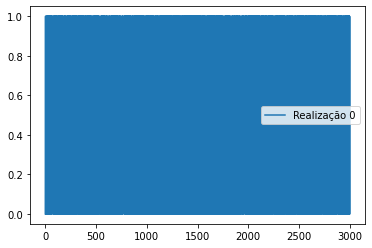

In [ ]:
n = 3000
m = 1
X = processo_bernoulli(n,m)

for i in range(m):
  plt.plot(X[i], label="Realização {}".format(i))

plt.legend()

#### Autocorrelação

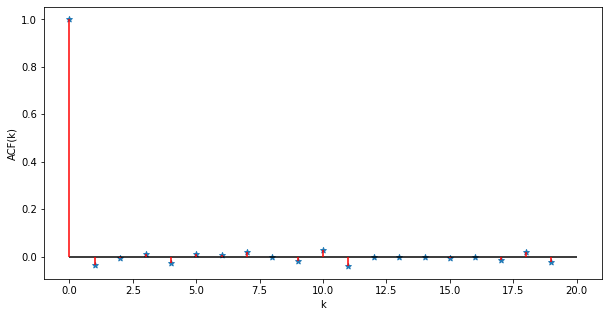

In [ ]:
k = 20

plot_acf(X, k)

#### Estacionariedade

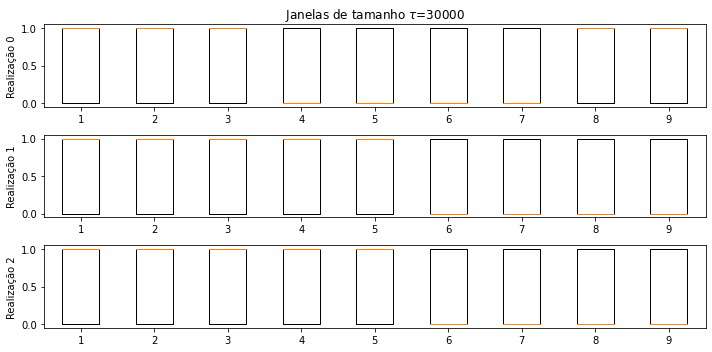

In [ ]:
n = 300000
m = 3
X = processo_bernoulli(n,m)

comparar_janelas(X)

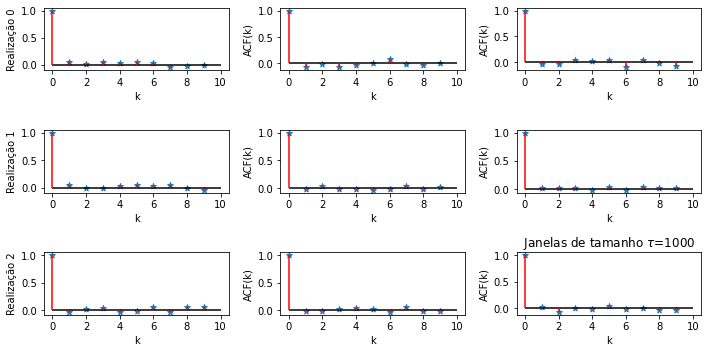

In [ ]:
n = 3000
m = 3
X = processo_bernoulli(n,m)

comparar_janelas_acf(X)

In [ ]:
ADF(X[0])

Estatística ADF: -55.90757104625896
p-Valor: 0.0
Valores Críticos:
	Alfa	Val. Crit	Resultado
	1%	-3.43253236279788	H0 Rejeitada
	5%	-2.86250422682754	H0 Rejeitada
	10%	-2.5672832833096195	H0 Rejeitada


### Ruído Branco Gaussiano (Gaussian White Noise - WGN)

* PE com espaço amostral contínuo $\Omega \in \mathbb{R}$ e  tempo discreto $T \in \mathbb{N}^+$.
* $X_t \sim \mathcal{N}(0,1)$

In [ ]:
def ruido_branco(n, m):
  return np.random.randn(m,n)

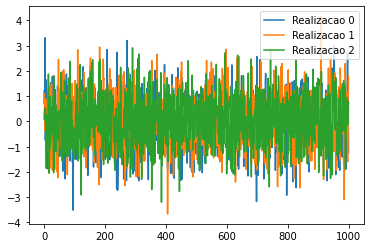

In [ ]:
n = 1000
m = 3
X = ruido_branco(n,m)

for i in range(m):
  plt.plot(X[i], label="Realizacao {}".format(i))

plt.legend()

#### Autocorrelação

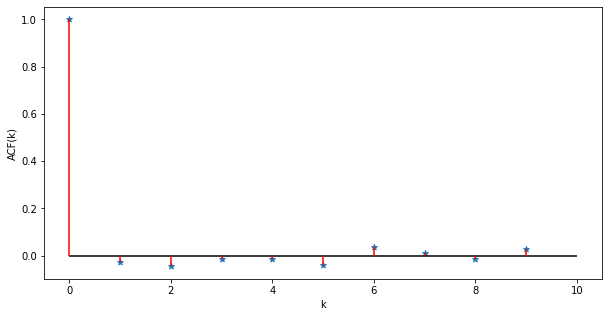

In [ ]:
k = 10
plot_acf(X, k)

#### Estacionariedade

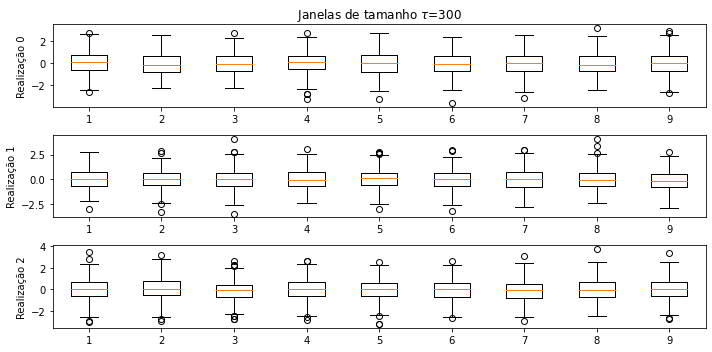

In [ ]:
n = 3000
m = 3
X = ruido_branco(n,m)

comparar_janelas(X)

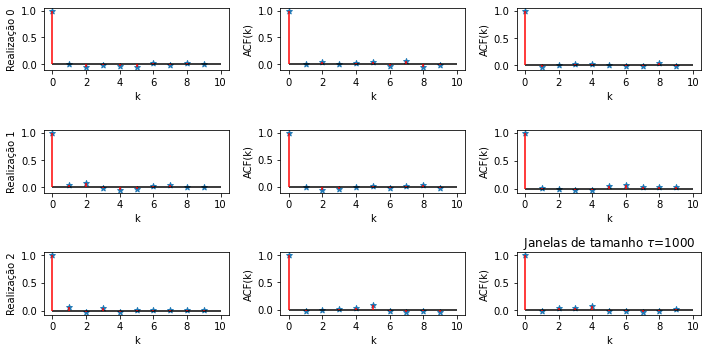

In [ ]:
comparar_janelas_acf(X)

In [ ]:
ADF(X[0])

Estatística ADF: -55.10607205072062
p-Valor: 0.0
Valores Críticos:
	Alfa	Val. Crit	Resultado
	1%	-3.43253236279788	H0 Rejeitada
	5%	-2.86250422682754	H0 Rejeitada
	10%	-2.5672832833096195	H0 Rejeitada


## Processos Aditivos

* PE Aditivo é aquele que

$$ X_0 = x $$

$$ X_t = f(X_{t-1},...)$$

### Passeio Aleatório (Random Walk)

* PE com espaço amostral contínuo $\Omega \in \mathbb{R}$ e  tempo discreto $T \in \mathbb{N}^+$.
* Definição recursiva:
$$X_0 \sim \mathcal{N}(0,1)$$
$$X_t = X_{t-1} + \mathcal{N}(0,1)$$
* Definição usando WGN:

Dadas $n$ VAs $Y_i \sim \mathcal{N}(0,1)$, IID:

$$X_t = \sum_{i=0}^t Y_i$$

In [ ]:
def passeio_aleatorio(n, m):
  X = ruido_branco(n,m)
  for i in range(m):
    for j in range(1, n):
      X[i,j] += X[i,j-1]
  return X

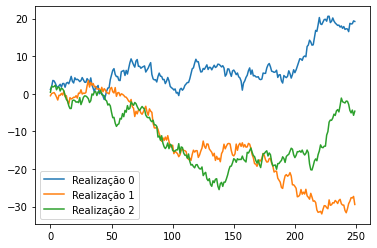

In [ ]:
m = 3
n = 250
X = passeio_aleatorio(n, m)
for i in range(m):
  plt.plot(X[i,:], label="Realização {}".format(i))

plt.legend()

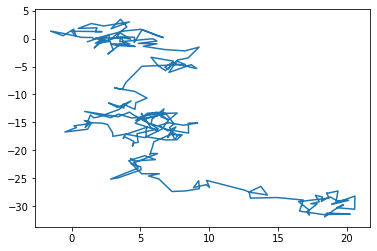

In [ ]:
plt.plot(X[0], X[1])

#### Autocorrelação

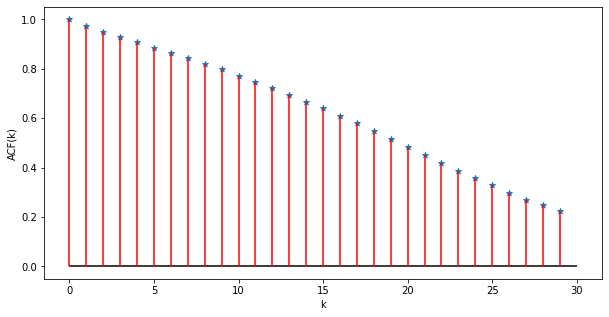

In [ ]:
k = 30
plot_acf(X, k)

#### Estacionariedade

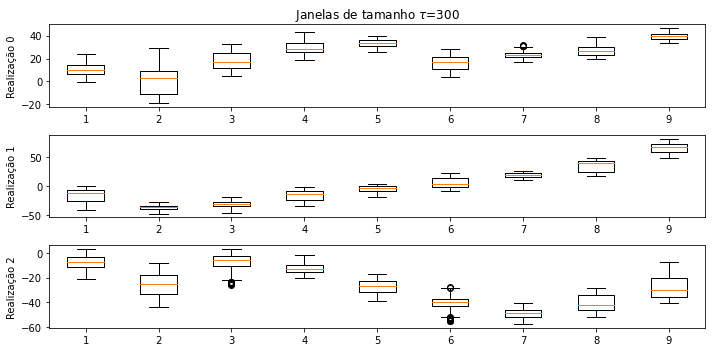

In [ ]:
n = 3000
m = 3
X = passeio_aleatorio(n, m)

comparar_janelas(X)

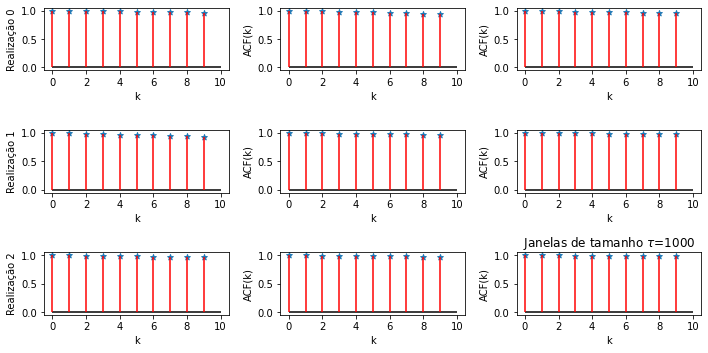

In [ ]:
comparar_janelas_acf(X)

In [ ]:
ADF(X[0])

Estatística ADF: -0.340463255968751
p-Valor: 0.9195748033330391
Valores Críticos:
	Alfa	Val. Crit	Resultado
	1%	-3.43253236279788	H0 Aceita
	5%	-2.86250422682754	H0 Aceita
	10%	-2.5672832833096195	H0 Aceita


### Processo de Wiener

O Processo de Wiener é o Passeio Aleatório em tempo contínuo, $\Omega \in \mathbb{R}$ e $T \in \mathbb{R}^+$.

Por ser de tempo contínuo, não avaliamos um valor pontual de $X_t$, mas um intervalo de valores, de tamanho arbitrário, no espaço contínuo $T$ 

Sendo assim, no intervalo $X_t - X_s$ o Processo de Wiener assume **uma distribuição** gaussiana, dados $s,t \in T$ e $0 \leq s \leq t \leq \infty$, tal que: 

$$X_t - X_s \sim \sqrt{t - s}\cdot\mathcal{N}(0,1)$$

Intervalos distintos e subsequentes, como por exemplo $[t,s]$ e $[u,v]$, tal que $0 \leq s \leq t \leq u \leq v \leq \infty$, apresentam a propriedade de $X_t - X_s \perp X_u - X_v$

Para estimar **o valor** de um intervalo de tamanho $\Delta t = t_2 - t_1$, tal que $t_2 = t_1 + \nu$,   de forma recursiva.

$$X_0 =0$$

$$X_{t + \Delta t} = X_{t - \Delta t} + \sqrt{\Delta t}\mathcal{N}(0,1)$$

Pode-se ajustar o tamanho do intervalo $\Delta t$ para valores infinitesinalmente pequenos de tempo ($\Delta t \rightarrow 0$), e a propriedade $\sqrt{\Delta t}\cdot\mathcal{N}(0,1)$ ainda se mantém.

Uma forma de aproximar $\Delta t$ é selecionar um período de tempo $\tau$ e uma quantidade de amostras $n$ nesse período de tempo. Dessa forma $\Delta t = \frac{\tau}{n}$. 

In [ ]:
def processo_wiener(n, m, dt=0.1):
  wgn = ruido_branco(n,m)
  X = np.zeros((m,n))
  sqrt_dt = np.sqrt(dt)
  for i in range(m):
    for j in range(1, n):
      X[i,j] = X[i,j-1] + sqrt_dt*wgn[i,j] 
  return X

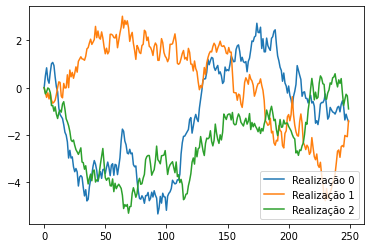

In [ ]:
m = 3
n = 250
X = processo_wiener(n, m)
for i in range(m):
  plt.plot(X[i,:], label="Realização {}".format(i))

plt.legend()

#### Autocorrelação

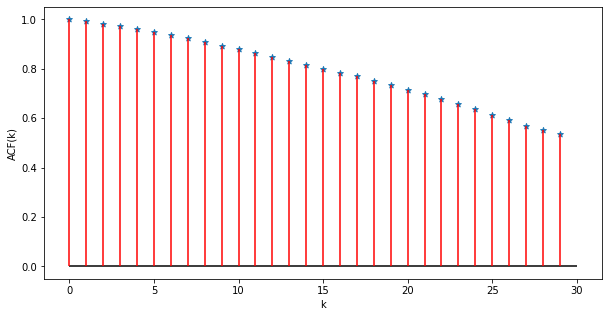

In [ ]:
k = 30
plot_acf(X,k)

#### Estacionariedade

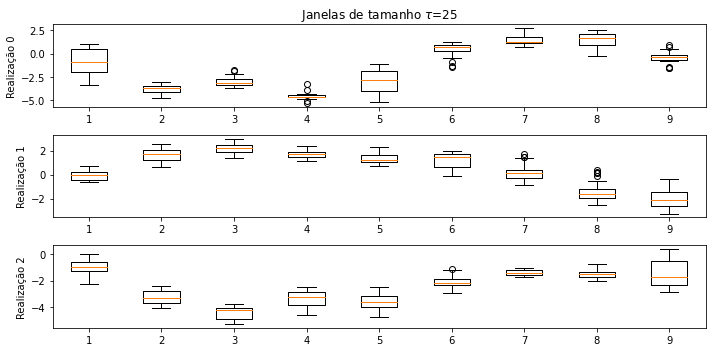

In [ ]:
comparar_janelas(X)

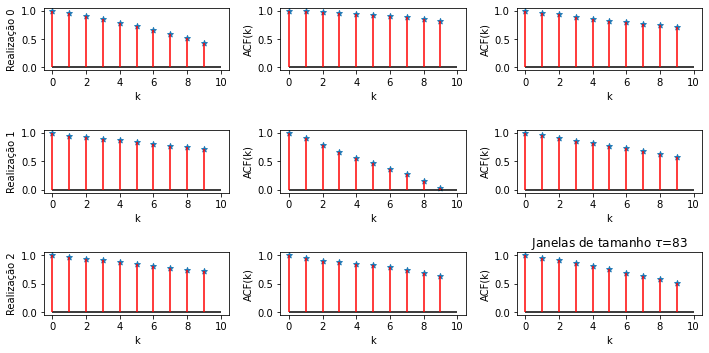

In [ ]:
comparar_janelas_acf(X)

In [ ]:
ADF(X[0])

Estatística ADF: -1.233369255123285
p-Valor: 0.6590789562517166
Valores Críticos:
	Alfa	Val. Crit	Resultado
	1%	-3.4568881317725864	H0 Aceita
	5%	-2.8732185133016057	H0 Aceita
	10%	-2.5729936189738876	H0 Aceita


## Processos de Contagem

* Processos de Contagem são Processos Estocásticos Aditivos de domínio discreto $\Omega \in \mathbb{N}^+$ em que $X_t$ representa a quantidade de ocorrências de um determinado evento no intervalo $(0,t]$, tal que:

* $X_0 = 0$ 
* Se $i \leq j$ então $X_i \leq X_j$, ou seja, o processo é continuamente crescente.

### Processo de Poisson

* Um Processo de Poisson é um PE de tempo contínuo, onde os tempos de ocorrência dos eventos são irregulares. Cada unidade infinitesimal tempo é considerada como uma VA $Y_i \sim Exp(\lambda)$, tal que o $n$-ésimo $t$ é $t = \sum_{i=1}^t Y_i$.

* Cada evento no tempo $t$ é um Ensaio de Bernoulli, $\Omega = \{0,1\}$

* $X_t \sim Poisson(\lambda t)$ representa o somatório de todos os eventos ocorridos no intervalo $(0, t]$, em que  $\lambda$ é a média de eventos por unidade de tempo. , que pode ser representada como o somatórios de VAs $Y_i \sim Exp(\lambda)$, para $i=1..t$, tal que:

* $X_0 = 0$

In [ ]:
def processo_poisson(n, m, l = 0.5):
  T = np.random.exponential(scale=l, size=(m,n))
  for i in range(m):
    for j in range(1, n):
      T[i,j] += T[i,j-1]
  return T

In [ ]:
processo_poisson(10, 1)

array([[0.87523451, 1.19210587, 1.31341175, 1.63812371, 1.79774453,
        3.75606093, 4.36903222, 5.69969863, 6.23033945, 6.45705439]])

Text(0, 0.5, '$X_t$')

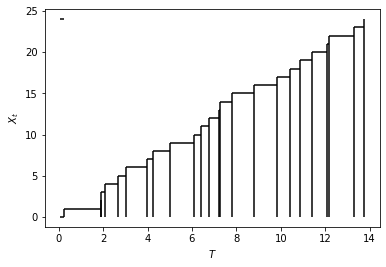

In [ ]:
m = 1
n = 25
T = processo_poisson(n, m, l=0.5)
X = [i for i in range(n)]
plt.hlines(X, T[0,0:-1], T[0,1:])
plt.vlines(T[0,:], [0 for i in range(n)], X)
plt.xlabel("$T$")
plt.ylabel("$X_t$")

#### Autocorrelação

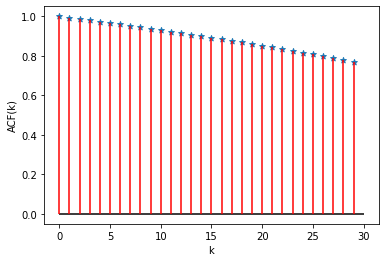

In [ ]:
k = 30
plot_acf(X, k)

#### Estacionariedade

## Processos AutoRegressivos

### Processo AR(1)

$X_0 \sim \mathcal{N}(0,1)$

$X_t = \alpha X_{t-1} + \beta + \mathcal{N}(0,1)$

In [ ]:
def autogregessivo(n, m, alpha, beta):
  X = np.random.randn(m,n)
  for i in range(m):
    for j in range(1, n):
      X[i,j] += alpha * X[i,j-1] + beta
  return X
  

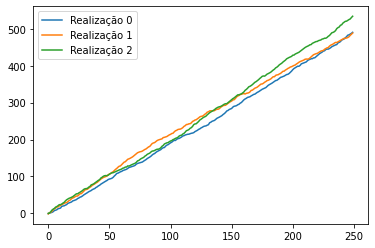

In [ ]:
m = 3
n = 250
X = autogregessivo(n, m, 1.0, 2)
for i in range(m):
  plt.plot(X[i,:], label="Realização {}".format(i))

plt.legend()

#### Autocorrelação

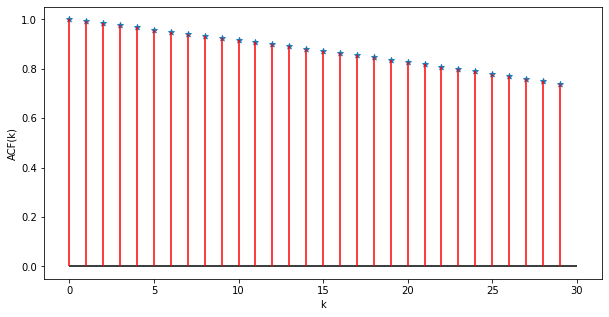

In [ ]:
k = 30
plot_acf(X, k)

#### Estacionariedade

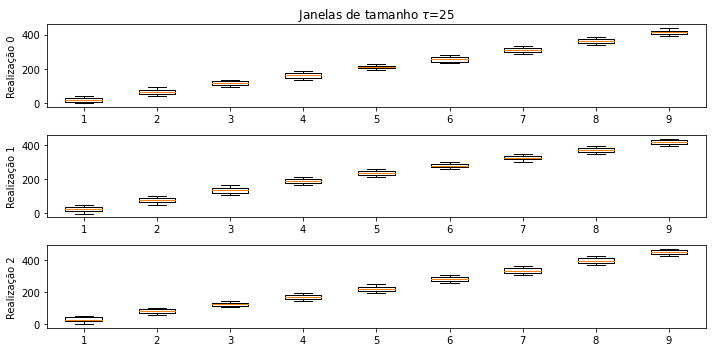

In [ ]:
comparar_janelas(X)

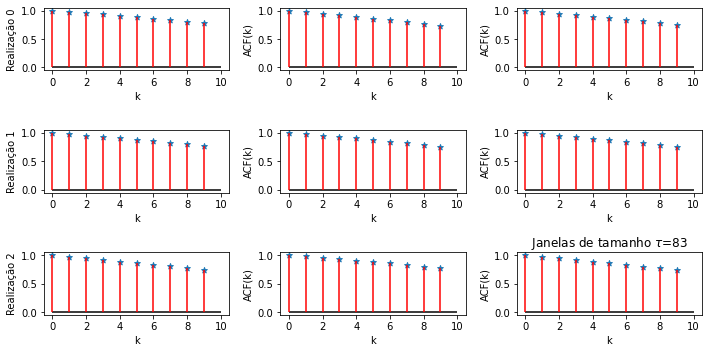

In [ ]:
comparar_janelas_acf(X)

In [ ]:
ADF(X[0])

Estatística ADF: 1.723295216192196
p-Valor: 0.998184109520526
Valores Críticos:
	Alfa	Val. Crit	Resultado
	1%	-3.4568881317725864	H0 Aceita
	5%	-2.8732185133016057	H0 Aceita
	10%	-2.5729936189738876	H0 Aceita


## Processos Estacionários na Tendência

$X_0 \sim \mathcal{N}(0,1)$

$X_t = \alpha t + \beta + \mathcal{N}(0,1)$

* Processo Estacionário nas Diferenças

$\Delta X_t = X_t - X_{t-1}$

In [ ]:
def tsp(n, m, alpha, beta):
  X = np.random.randn(m,n)
  for i in range(m):
    for j in range(1, n):
      X[i,j] += alpha * j + beta
  return X

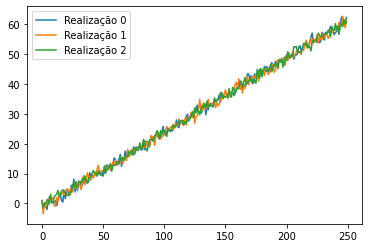

In [ ]:
m = 3
n = 250
X = tsp(n, m, .25, -1.2)
for i in range(m):
  plt.plot(X[i,:], label="Realização {}".format(i))

plt.legend()

In [ ]:
def dsp(X, P=1):
  m,n = X.shape
  X2 = np.random.randn(m,n)
  for i in range(m):
    for j in range(P, n):
      X2[i,j] = X[i,j] - X[i, j-P]
  return X2

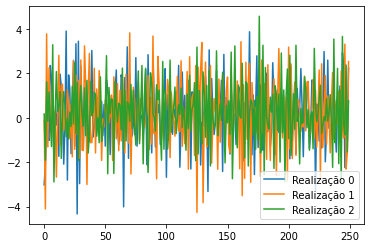

In [ ]:
X2 = dsp(X)

for i in range(m):
  plt.plot(X2[i,:], label="Realização {}".format(i))

plt.legend()

In [ ]:
ADF(X2[1])

Estatística ADF: -9.529255351649654
p-Valor: 2.920678438788155e-16
Valores Críticos:
	Alfa	Val. Crit	Resultado
	1%	-3.4577787098622674	H0 Rejeitada
	5%	-2.873608704758507	H0 Rejeitada
	10%	-2.573201765981991	H0 Rejeitada


## Processos Cicloestacionários

P é o período de ciclo

$X_0,..., X_P \sim \mathcal{N}(0,1)$

$X_t = X_{t-P} + \mathcal{N}(0,1)$

In [ ]:
def csp(n, m, P):
  inicial = passeio_aleatorio(P, m)
  X = np.random.randn(m,n)
  for i in range(m):
    for j in range(n):
      if j < P:
        X[i,j] += inicial[i,j]
      else:
        X[i,j] += X[i,j - P]
  return X

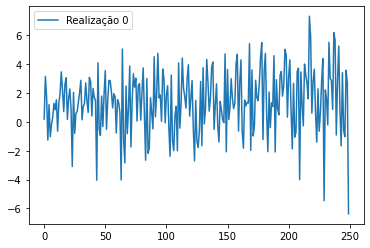

In [ ]:
m = 1
n = 250
P = 20
X = csp(n, m, P)
for i in range(m):
  plt.plot(X[i,:], label="Realização {}".format(i))

plt.legend()

#### Autocorrelação

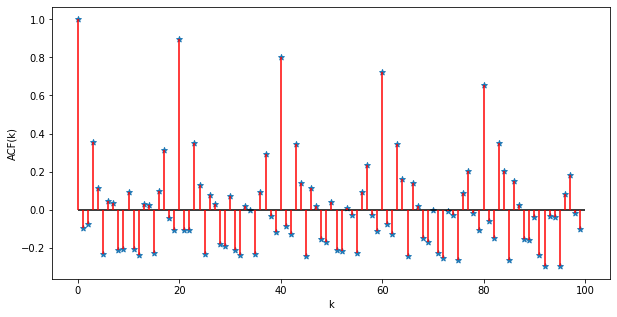

In [ ]:
k = 100
plot_acf(X,k)

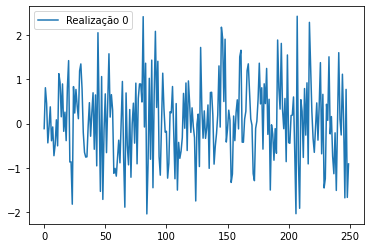

In [ ]:
X2 = dsp(X,P=20)

for i in range(m):
  plt.plot(X2[i,:], label="Realização {}".format(i))

plt.legend()

## Processos Heterocedásticos

$$\mathbb{Var}[X_t] \neq \mathbb{Var}[X_{t+\tau}]$$

$$\mathbb{Var}[X_t] = f(t)$$

$$X_t = X_{t-1} + \mathcal{N}(0,\alpha t)$$

In [ ]:
def processo_heterocedastico(n, m, alpha):
  X = np.zeros((m,n))
  for i in range(m):
    for j in range(1,n):
      X[i,j] += np.random.normal(loc=0,scale=alpha * j)
  return X

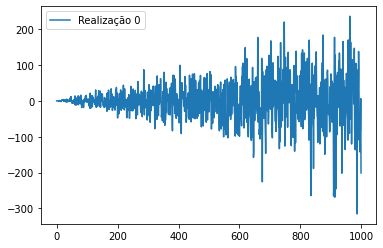

In [ ]:
X = processo_heterocedastico(1000, 3, 0.1)

for i in range(m):
  plt.plot(X[i,:], label="Realização {}".format(i))

plt.legend()

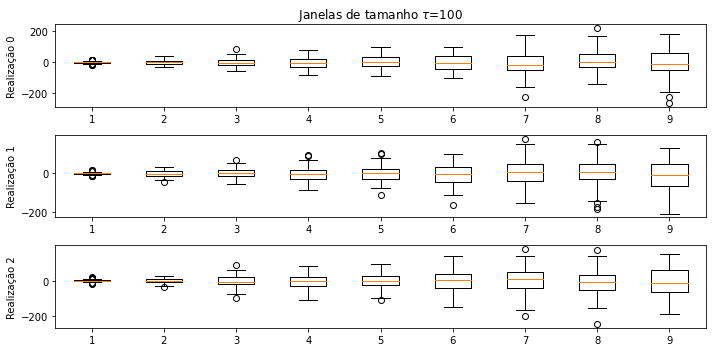

In [ ]:
comparar_janelas(X)

## Combinando Processos

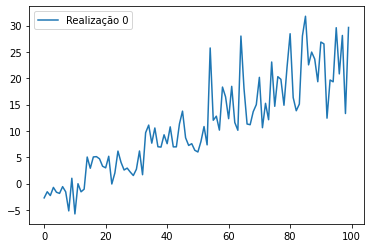

In [ ]:
n = 100
m = 1
X1 = tsp(n, m, 0.3, 0)
X2 = processo_heterocedastico(n, m, 0.05)
X3 = csp(n, m, 20)

X4 = X1 + X2 + X3

for i in range(m):
  plt.plot(X4[i,:], label="Realização {}".format(i))

plt.legend()